<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/main/tf_mnist_NUMBERCLASSIFICATION_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

print(tf.__version__)

2.12.0


In [2]:
#
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build The Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2951 - accuracy: 0.9146 - val_loss: 0.1384 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1414 - accuracy: 0.9571 - val_loss: 0.1026 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1073 - accuracy: 0.9679 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9726 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.0795 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9791 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0673 - val_accurac

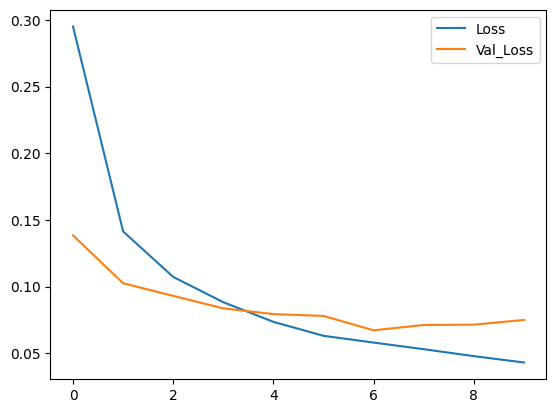

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

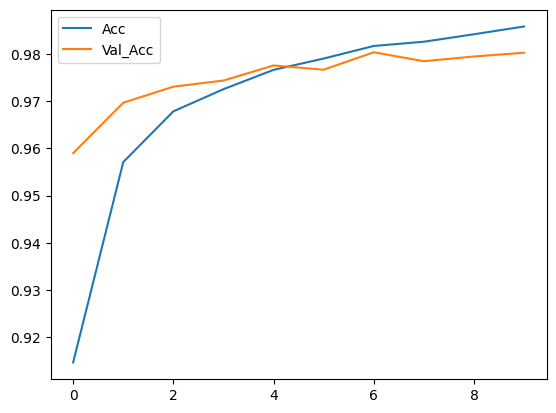

In [9]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='Acc')
plt.plot(r.history['val_accuracy'], label='Val_Acc')
plt.legend()

In [10]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9803
[0.07504760473966599, 0.9803000092506409]


313/313 [==============================] - 1s 2ms/step
Confusion Matrix, without normalization
[[ 969    0    1    2    2    0    2    0    3    1]
 [   0 1125    3    1    0    0    1    0    5    0]
 [   0    1 1015    1    3    0    2    4    6    0]
 [   0    0    6  994    0    2    0    4    4    0]
 [   0    0    1    0  970    0    7    0    1    3]
 [   2    0    0   12    1  860    4    1   10    2]
 [   4    3    1    0    3    7  937    0    3    0]
 [   0    4   13    3    0    0    0 1001    2    5]
 [   3    0    3    1    3    0    0    4  959    1]
 [   0    3    1    4   14    3    0    4    7  973]]


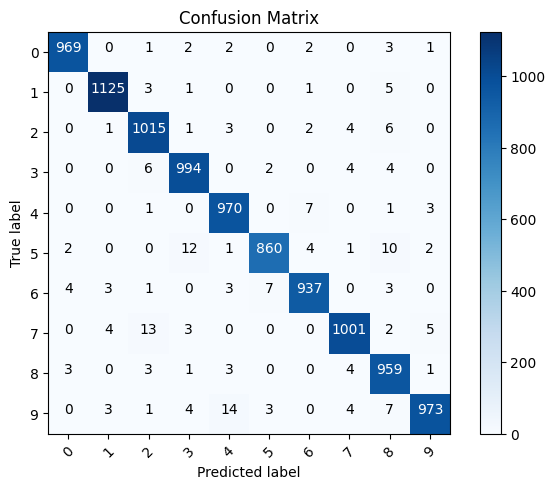

In [15]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
# Plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=true'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  plt.imshow(cm , interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color='white' if cm[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

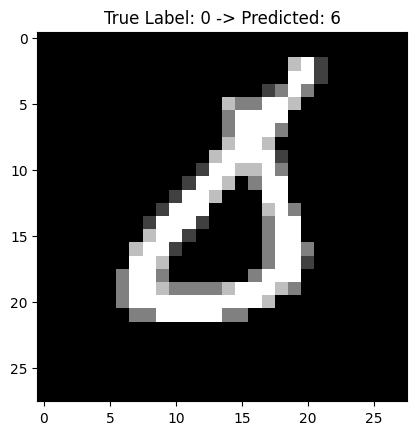

In [20]:
# Show some misclassified expamples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s -> Predicted: %s" % (y_test[i], p_test[i]));